In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

1. 
판매성과.xlsx)
날짜, 요일 -> 결제금액 높은거 확인 --> 그 시기에 왜 많았는지, ex) 설, 가정의달...,
-> 전략 ~ 선물용...~

요일별로 시간대별 -> 판매건수, 결제금


In [106]:
saleDF = pd.read_excel(r'C:\Users\KDP-23\Desktop\KDT\Numpy\0822\판매성과_2024-01-01_2024-06-30.xlsx')
saleDF

,날짜,요일,시간대,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량
0,2024-06-30,일,14시,2,2,0,79800,0,39900,2,1
1,2024-06-30,일,17시,2,2,1,60400,1,30200,2,1
2,2024-06-30,일,08시,1,2,0,30600,0,15300,3,2
3,2024-06-30,일,20시,1,1,1,28400,1,28400,1,1
4,2024-06-30,일,22시,1,1,0,25200,0,25200,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1471,2024-01-01,월,01시,1,1,1,21540,1,21540,2,2
1472,2024-01-01,월,20시,1,1,1,15000,1,15000,1,1
1473,2024-01-01,월,09시,1,1,1,15000,1,15000,1,1
1474,2024-01-01,월,10시,1,1,0,11000,0,11000,1,1


In [107]:
saleDF.isna().sum()

날짜              0
요일              0
시간대             0
결제자수            0
결제수             0
모바일비율(결제건수)    49
결제금액            0
모바일비율(결제금액)    49
결제당 결제금액       49
결제상품수량          0
결제당 상품수량       49
dtype: int64

In [108]:
saleDF.dropna()

,날짜,요일,시간대,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량
0,2024-06-30,일,14시,2,2,0,79800,0,39900,2,1
1,2024-06-30,일,17시,2,2,1,60400,1,30200,2,1
2,2024-06-30,일,08시,1,2,0,30600,0,15300,3,2
3,2024-06-30,일,20시,1,1,1,28400,1,28400,1,1
4,2024-06-30,일,22시,1,1,0,25200,0,25200,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1471,2024-01-01,월,01시,1,1,1,21540,1,21540,2,2
1472,2024-01-01,월,20시,1,1,1,15000,1,15000,1,1
1473,2024-01-01,월,09시,1,1,1,15000,1,15000,1,1
1474,2024-01-01,월,10시,1,1,0,11000,0,11000,1,1


In [109]:
saleDF1 = saleDF[["날짜","요일","시간대","결제수","결제금액"]]
saleDF1

,날짜,요일,시간대,결제수,결제금액
0,2024-06-30,일,14시,2,79800
1,2024-06-30,일,17시,2,60400
2,2024-06-30,일,08시,2,30600
3,2024-06-30,일,20시,1,28400
4,2024-06-30,일,22시,1,25200
...,...,...,...,...,...
1471,2024-01-01,월,01시,1,21540
1472,2024-01-01,월,20시,1,15000
1473,2024-01-01,월,09시,1,15000
1474,2024-01-01,월,10시,1,11000


In [110]:
date_saleDF = saleDF1.groupby('날짜').sum(['결제수','결제금액'])
date_saleDF

,결제수,결제금액
날짜,,
2024-01-01,25,787940
2024-01-02,31,926770
2024-01-03,21,648680
2024-01-04,37,1094410
2024-01-05,21,558290
...,...,...
2024-06-26,1,44400
2024-06-27,9,234300
2024-06-28,17,552000


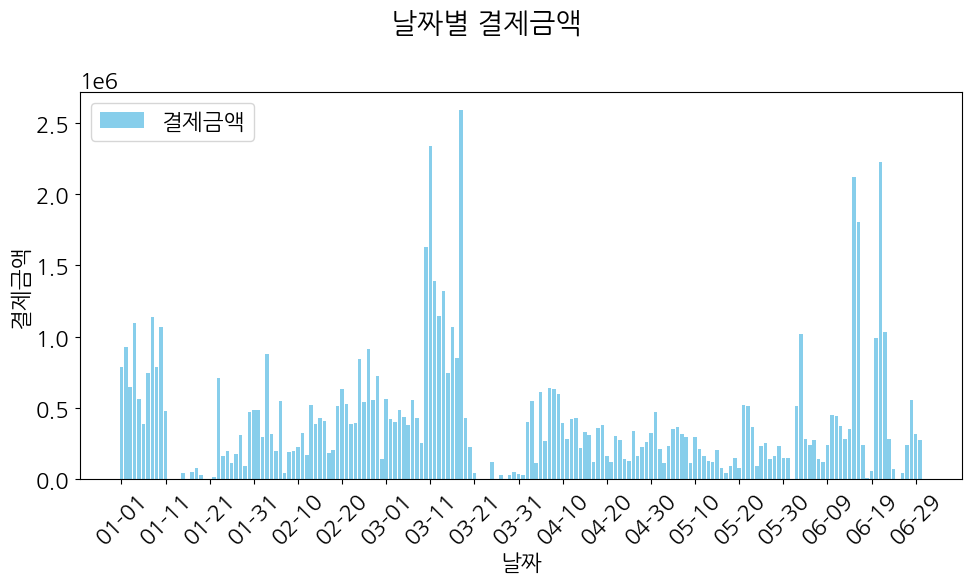

In [111]:
# 날짜별 결제 금액

fig, ax1 = plt.subplots(figsize=(10, 6))

if not pd.api.types.is_datetime64_any_dtype(date_saleDF.index):
    date_saleDF.index = pd.to_datetime(date_saleDF.index)

ax1.bar(date_saleDF.index, date_saleDF['결제금액'], color='skyblue', label='결제금액')
ax1.set_ylabel('결제금액')
ax1.set_xlabel('날짜')

date_ticks = pd.date_range(start=date_saleDF.index.min(), end=date_saleDF.index.max(), freq='10D')
ax1.set_xticks(date_ticks) 
ax1.set_xticklabels(date_ticks.strftime('%m-%d'), rotation=45)

fig.suptitle('날짜별 결제금액', fontsize=20)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

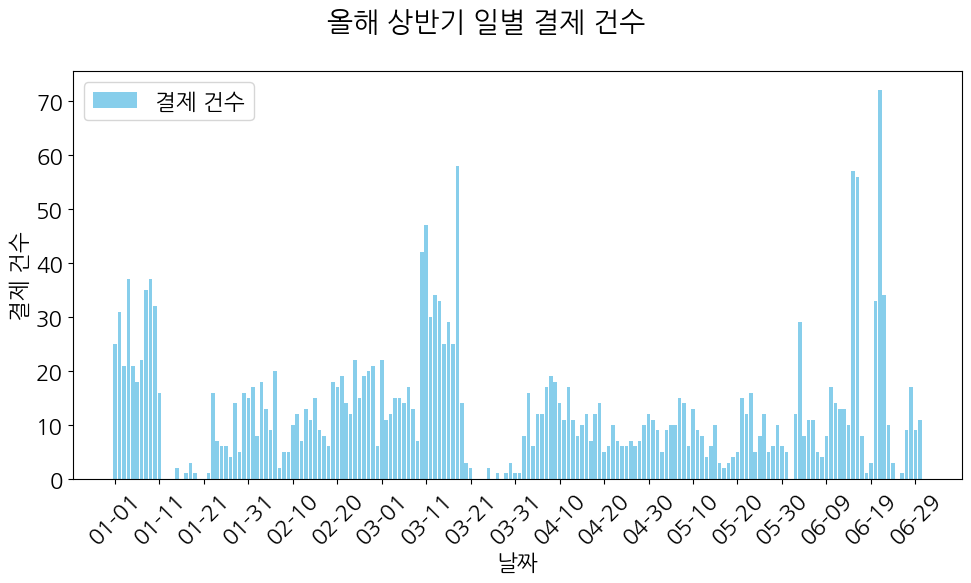

In [112]:
fig, ax1 = plt.subplots(figsize=(10, 6))

if not pd.api.types.is_datetime64_any_dtype(date_saleDF.index):
    date_saleDF.index = pd.to_datetime(date_saleDF.index)

ax1.bar(date_saleDF.index, date_saleDF['결제수'], color='skyblue', label='결제 건수')
ax1.set_ylabel('결제 건수')
ax1.set_xlabel('날짜')

date_ticks = pd.date_range(start=date_saleDF.index.min(), end=date_saleDF.index.max(), freq='10D')
ax1.set_xticks(date_ticks) 
ax1.set_xticklabels(date_ticks.strftime('%m-%d'), rotation=45) 

fig.suptitle('올해 상반기 일별 결제 건수', fontsize=20)
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

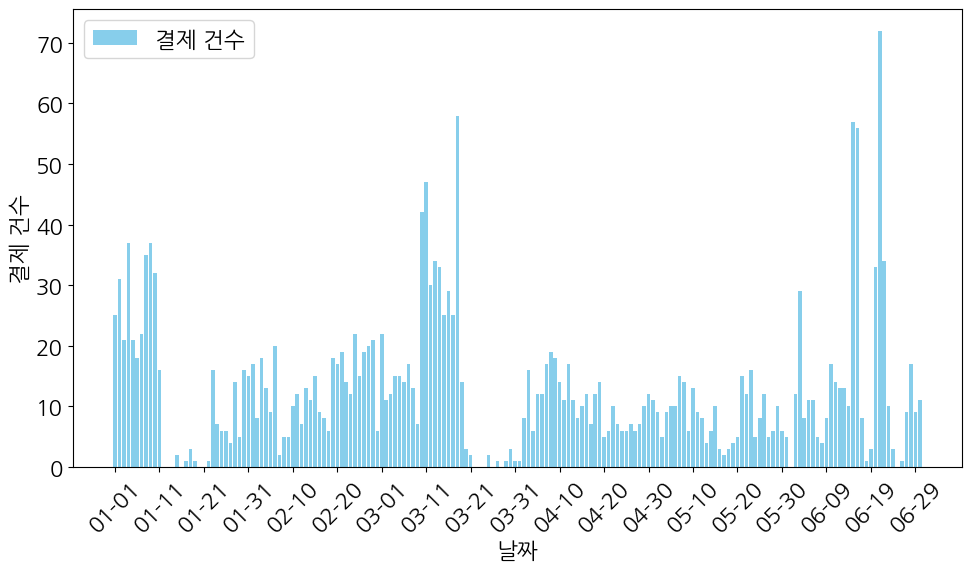

In [113]:
fig, ax1 = plt.subplots(figsize=(10, 6))

if not pd.api.types.is_datetime64_any_dtype(date_saleDF.index):
    date_saleDF.index = pd.to_datetime(date_saleDF.index)

ax1.bar(date_saleDF.index, date_saleDF['결제수'], color='skyblue', label='결제 건수')
ax1.set_ylabel('결제 건수')
ax1.set_xlabel('날짜')

date_ticks = pd.date_range(start=date_saleDF.index.min(), end=date_saleDF.index.max(), freq='10D') 
ax1.set_xticks(date_ticks) 
ax1.set_xticklabels(date_ticks.strftime('%m-%d'), rotation=45)  

ax1.legend(loc='upper left')

plt.rcParams['font.size'] = 16

plt.tight_layout()  
# plt.savefig('transparent_day_sale.png', transparent=True) 
plt.show()

In [114]:
week_saleDF = saleDF1.groupby('요일').sum(['결제수','결제금액']).sort_values(['결제금액'], ascending=False)
week_saleDF

,결제수,결제금액
요일,,
월,374,13406060
화,351,11143990
일,331,10561600
토,297,9822210
수,309,9477230
금,307,9434090
목,312,8954500


In [115]:
days = week_saleDF.index.tolist()
days

['월', '화', '일', '토', '수', '금', '목']

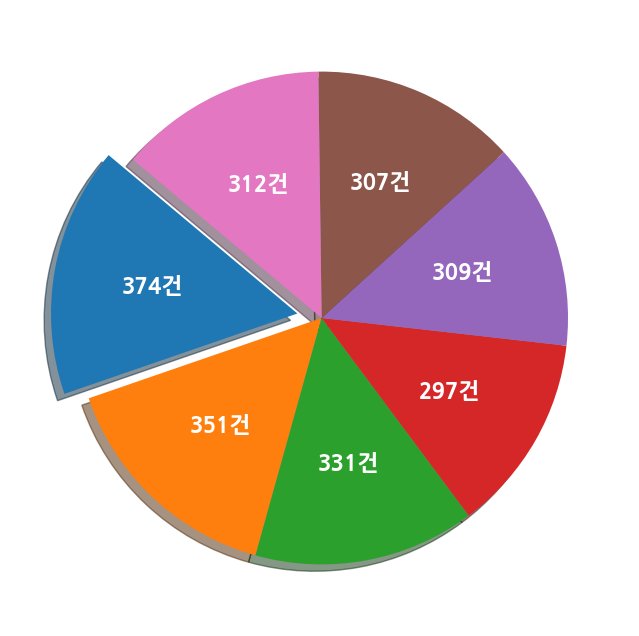

In [116]:

payment_count = week_saleDF['결제수']
explode = [0.1 if i == max(payment_count) else 0 for i in payment_count]

plt.figure(figsize=(8, 8))
plt.pie(payment_count, labels=days, autopct=lambda p: f'{int(round(p*sum(payment_count)/100))}건', startangle=140, explode=explode, shadow=True,
        textprops={'fontsize': 16, 'fontweight' : 'bold', 'color': 'white'})  
# plt.title("요일별 결제 건수", fontsize=20,fontweight='bold')  

plt.show()

In [118]:
time_saleDF = saleDF1.groupby('시간대').sum(['결제수','결제금액'])
time_saleDF

,결제수,결제금액
시간대,,
00시,62,1718810
01시,39,1067270
02시,24,665600
03시,13,394580
04시,21,498290
05시,19,589400
06시,60,2388730
07시,104,3560870
08시,160,5489690


C:\Users\KDP-23\AppData\Local\Temp\ipykernel_19384\3861765009.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(time_saleDF.index[i], time_saleDF['결제수'][i] + 5, time_saleDF['결제수'][i], color='black', ha='center')


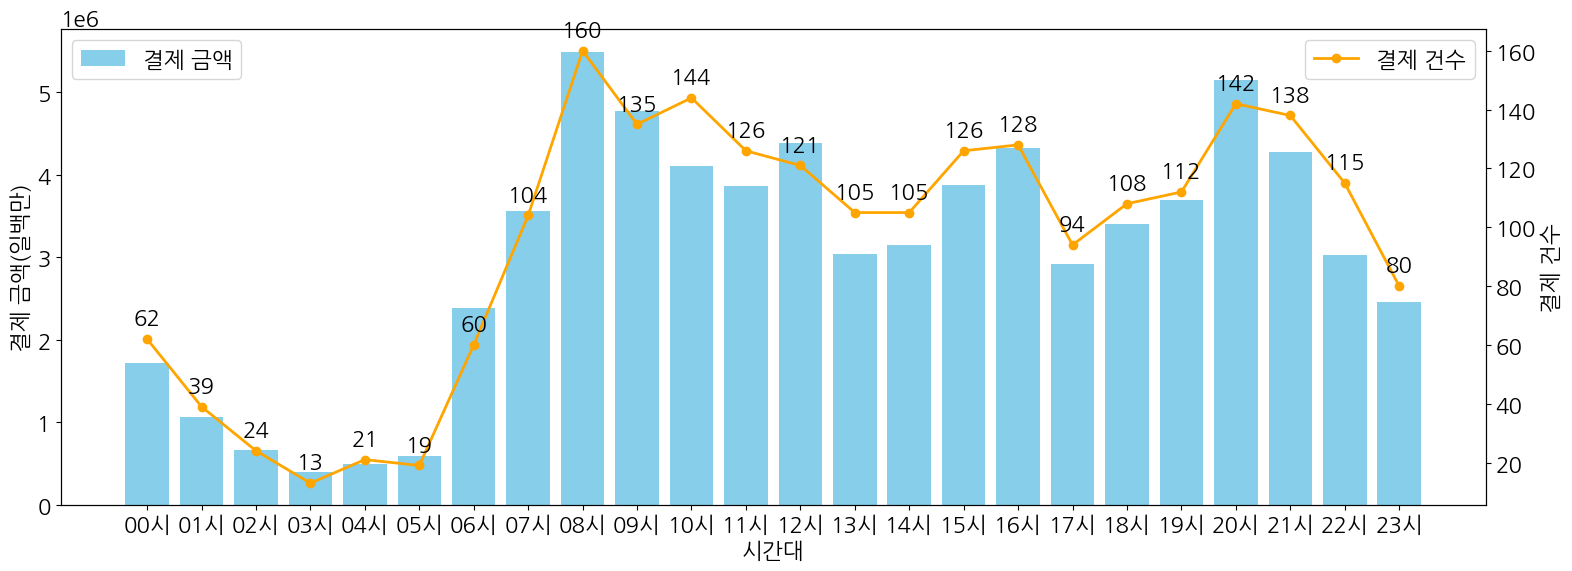

In [119]:
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(time_saleDF.index, time_saleDF['결제금액'], color='skyblue', label='결제 금액')
ax1.set_ylabel('결제 금액(일백만)')
ax1.set_xlabel('시간대')

ax2 = ax1.twinx()
ax2.plot(time_saleDF.index, time_saleDF['결제수'], color='orange', marker='o', linewidth=2, label='결제 건수')
ax2.set_ylabel('결제 건수')


for i in range(len(time_saleDF)):
    ax2.text(time_saleDF.index[i], time_saleDF['결제수'][i] + 5, time_saleDF['결제수'][i], color='black', ha='center')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

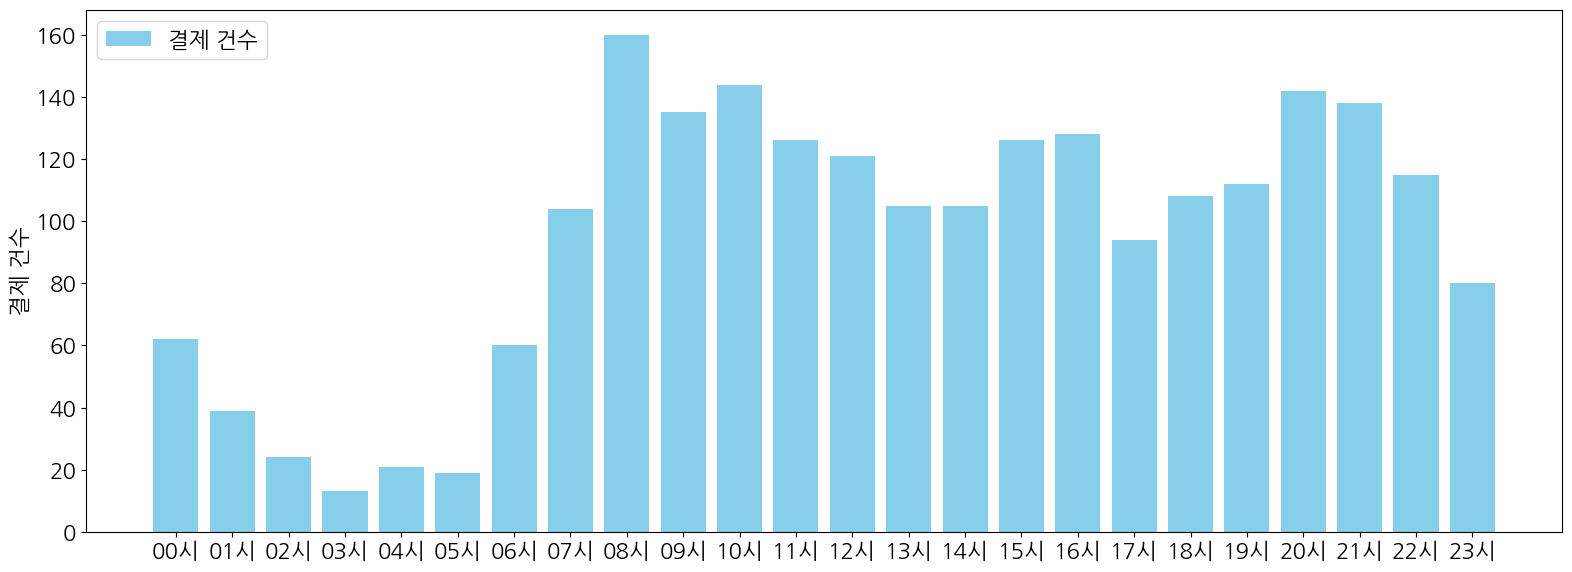

In [120]:
fig, ax1 = plt.subplots(figsize=(16, 6))


ax1.bar(time_saleDF.index, time_saleDF['결제수'], color='skyblue', label='결제 건수')
ax1.set_ylabel('결제 건수')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [122]:
saleDF1

,날짜,요일,시간대,결제수,결제금액
0,2024-06-30,일,14시,2,79800
1,2024-06-30,일,17시,2,60400
2,2024-06-30,일,08시,2,30600
3,2024-06-30,일,20시,1,28400
4,2024-06-30,일,22시,1,25200
...,...,...,...,...,...
1471,2024-01-01,월,01시,1,21540
1472,2024-01-01,월,20시,1,15000
1473,2024-01-01,월,09시,1,15000
1474,2024-01-01,월,10시,1,11000


In [123]:
saleDF1['month'] = pd.to_datetime(saleDF1['날짜']).dt.month
saleDF1

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_19384\3747607383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saleDF1['month'] = pd.to_datetime(saleDF1['날짜']).dt.month


,날짜,요일,시간대,결제수,결제금액,month
0,2024-06-30,일,14시,2,79800,6
1,2024-06-30,일,17시,2,60400,6
2,2024-06-30,일,08시,2,30600,6
3,2024-06-30,일,20시,1,28400,6
4,2024-06-30,일,22시,1,25200,6
...,...,...,...,...,...,...
1471,2024-01-01,월,01시,1,21540,1
1472,2024-01-01,월,20시,1,15000,1
1473,2024-01-01,월,09시,1,15000,1
1474,2024-01-01,월,10시,1,11000,1


In [124]:
month_saleDF = saleDF1.groupby('month').sum(['결제수','결제금액'])
month_saleDF = month_saleDF[['결제수','결제금액']]
month_saleDF

,결제수,결제금액
month,,
1,392,11512420
2,371,12122960
3,476,17951000
4,307,9472000
5,256,6796000
6,479,14945300


In [125]:
pd.options.display.float_format = '{:.0f}'.format
month_saleDF.mean()

결제수         380
결제금액   12133280
dtype: float64

In [126]:
days = month_saleDF.index.tolist()
month = []
for i in days:
    m = str(i)+'월'
    month.append(m)

month

['1월', '2월', '3월', '4월', '5월', '6월']

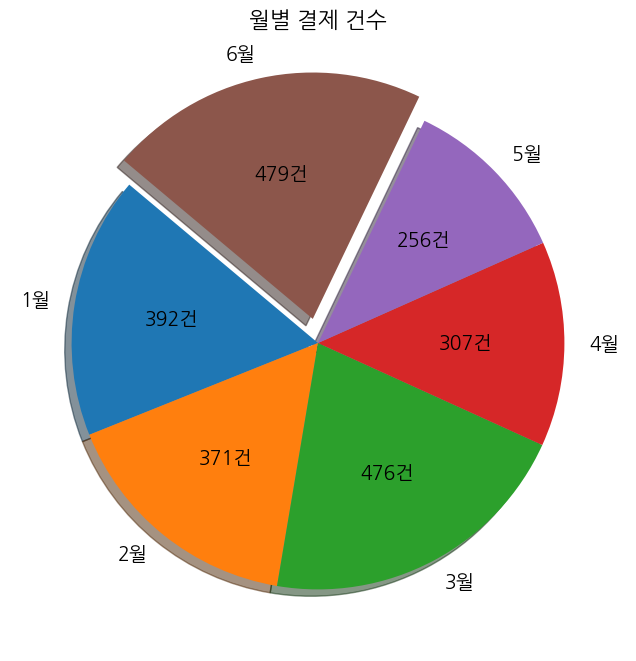

In [127]:
payment_count = month_saleDF['결제수']
explode = [0.1 if i == max(payment_count) else 0 for i in payment_count]

plt.figure(figsize=(8, 8))
plt.pie(payment_count, labels=month, autopct=lambda p: f'{int(round(p*sum(payment_count)/100))}건', startangle=140, explode=explode, shadow=True,
        textprops={'fontsize': 14})  
plt.title("월별 결제 건수", fontsize=16)  

plt.show()

In [128]:
month_saleDF.describe()

,결제수,결제금액
count,6,6
mean,380,12133280
std,89,3942280
min,256,6796000
25%,323,9982105
50%,382,11817690
75%,455,14239715
max,479,17951000


In [129]:
aaa = saleDF.copy()

In [130]:
aaa

,날짜,요일,시간대,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량
0,2024-06-30,일,14시,2,2,0,79800,0,39900,2,1
1,2024-06-30,일,17시,2,2,1,60400,1,30200,2,1
2,2024-06-30,일,08시,1,2,0,30600,0,15300,3,2
3,2024-06-30,일,20시,1,1,1,28400,1,28400,1,1
4,2024-06-30,일,22시,1,1,0,25200,0,25200,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1471,2024-01-01,월,01시,1,1,1,21540,1,21540,2,2
1472,2024-01-01,월,20시,1,1,1,15000,1,15000,1,1
1473,2024-01-01,월,09시,1,1,1,15000,1,15000,1,1
1474,2024-01-01,월,10시,1,1,0,11000,0,11000,1,1


In [131]:
for i in range(len(aaa)):
    j = aaa.loc[i,'모바일비율(결제건수)']
    if 0< j :
        j = 1
    else :
        j = 0
    aaa.loc[i,'모바일비율(결제건수)']=j

aaa

,날짜,요일,시간대,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량
0,2024-06-30,일,14시,2,2,1,79800,0,39900,2,1
1,2024-06-30,일,17시,2,2,1,60400,1,30200,2,1
2,2024-06-30,일,08시,1,2,0,30600,0,15300,3,2
3,2024-06-30,일,20시,1,1,1,28400,1,28400,1,1
4,2024-06-30,일,22시,1,1,0,25200,0,25200,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1471,2024-01-01,월,01시,1,1,1,21540,1,21540,2,2
1472,2024-01-01,월,20시,1,1,1,15000,1,15000,1,1
1473,2024-01-01,월,09시,1,1,1,15000,1,15000,1,1
1474,2024-01-01,월,10시,1,1,0,11000,0,11000,1,1


In [132]:
aaa['month'] = pd.to_datetime(aaa['날짜']).dt.month
month_saleDF1 = aaa.groupby('month').sum(['결제수','결제금액','모바일비율(결제건수)'])
month_saleDF1 = month_saleDF1[['결제수','결제금액','모바일비율(결제건수)']]
month_saleDF1

,결제수,결제금액,모바일비율(결제건수)
month,,,
1,392,11512420,203
2,371,12122960,214
3,476,17951000,221
4,307,9472000,203
5,256,6796000,162
6,479,14945300,226


In [133]:

com = []
for i in range(1,len(month_saleDF1)+1):
    j = month_saleDF1.loc[i,'결제수'] - int(month_saleDF1.loc[i,'모바일비율(결제건수)'])
    com.append(j)

month_saleDF1['컴퓨터(결제건수)'] = com

In [134]:
month_saleDF1

,결제수,결제금액,모바일비율(결제건수),컴퓨터(결제건수)
month,,,,
1,392,11512420,203,189
2,371,12122960,214,157
3,476,17951000,221,255
4,307,9472000,203,104
5,256,6796000,162,94
6,479,14945300,226,253


In [135]:
ab = month_saleDF1.sum()

In [139]:
ab.drop('결제금액')

결제수           2281
모바일비율(결제건수)   1229
컴퓨터(결제건수)     1052
dtype: float64

In [ ]:
aaa['month'] = pd.to_datetime(aaa['날짜']).dt.month
month_saleDF2 = aaa[['결제수','결제금액','모바일비율(결제건수)']]
month_saleDF2

,결제수,결제금액,모바일비율(결제건수)
0,2,79800,1
1,2,60400,1
2,2,30600,0
3,1,28400,1
4,1,25200,0
...,...,...,...
1471,1,21540,1
1472,1,15000,1
1473,1,15000,1
1474,1,11000,0


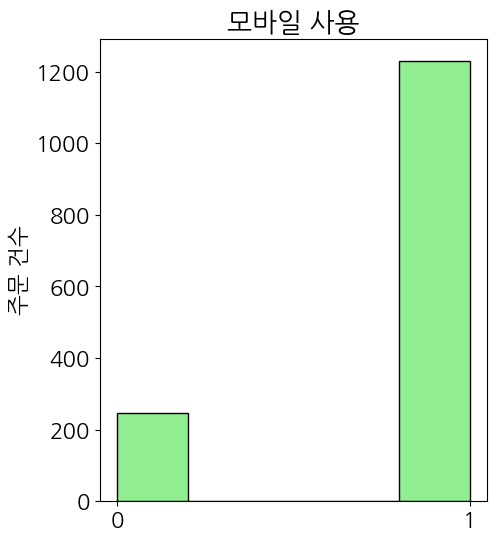

In [ ]:
# 모바일 비율(결제건수)에 대한 분포
month_saleDF2['모바일비율(결제건수)'].astype(int)
plt.figure(figsize=(5, 6))
plt.hist(month_saleDF2['모바일비율(결제건수)'], bins=5, color='lightgreen', edgecolor='black')
plt.title('모바일 사용')
plt.xticks([0, 1]) 
plt.xlabel('')
plt.ylabel('주문 건수')
plt.grid(False) 
plt.show()

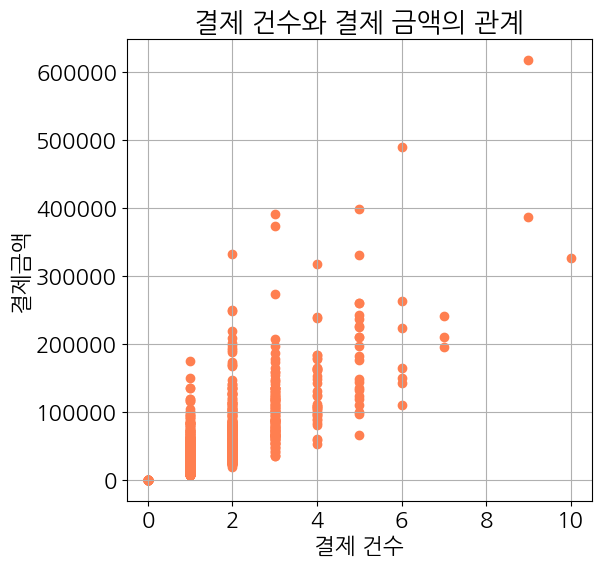

In [ ]:
# 3. 결제수와 결제금액의 관계 (산점도) 
plt.figure(figsize=(6, 6))
plt.scatter(month_saleDF2['결제수'], month_saleDF2['결제금액'], color='coral')
plt.title('결제 건수와 결제 금액의 관계')
plt.xlabel('결제 건수')
plt.ylabel('결제금액')
plt.grid(True)
plt.show()